In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
            'is_slippery':False}
)

In [2]:
env = gym.make('FrozenLake-v3')

In [3]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
dis = .9
num_episodes = 2000
rList=[]


In [4]:
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :]+np.random.randn(1,env.action_space.n)/(i+1))
        
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = reward + dis*np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

In [6]:
print('Success rate :'+str(sum(rList)/num_episodes))

Success rate :0.965


In [7]:
print('Final Q-Table Values')
print(Q)

Final Q-Table Values
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


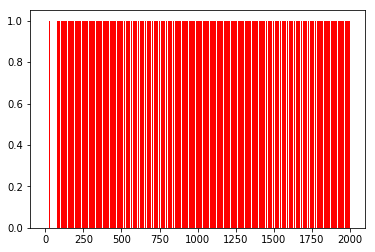

In [8]:
plt.bar(range(len(rList)),rList,color='red')
plt.show()